###  Required Setup
    1. create virtual environment in jupyter env
    2. install kernel in virtual environment created
    3. install required modules/packages

### References

**MarkUp:**

    1. https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm
    
    2. https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/
    
    3. https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
 
 **Setup**
 
    1. https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#specifying-a-location-for-an-environment
     
    2. https://janakiev.com/blog/jupyter-virtual-envs/
     
    3. https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/
 
 **GitHub**
 
     1. https://docs.github.com/en/get-started/quickstart/hello-world
     
     2. https://reproducible-science-curriculum.github.io/sharing-RR-Jupyter/01-sharing-github/
     
     3. https://www.geeksforgeeks.org/how-to-upload-project-on-github-from-jupyter-notebook/

# ToDo/Feature List
### Sn|Actor|Action|Status
   <div class="alert alert-block alert-danger">
    1. afolabi | the list of conditions to be satisfied | Waiting
    </div>

###  import required python modules

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# set up display area to show dataframe in jupyter qtconsole
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

import xlrd
import xlsxwriter

import math
import time
from time import sleep
import schedule

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec

import mplfinance as mpf
import yfinance as yf
from qtrade import Questrade

### get institution holders data function

In [2]:
def institutions_holding(): #not used yet need to talk to flo how it will be used!!!
    Tickers = ('apvo')
    for x in Tickers:
        stock = yf.Ticker(Tickers)
        # show major holders
        A=stock.major_holders
        B=stock.institutional_holders
        print(A)
        print(B)
        # show institutional holders
institutions_holding()

     0                      1                   
0   5.29%        % of Shares Held by All Insider
1  16.76%       % of Shares Held by Institutions
2  17.69%        % of Float Held by Institutions
3      36  Number of Institutions Holding Shares
              Holder              Shares  Date Reported  % Out    Value 
0   Tang Capital Management, LLC  1760000   2021-09-29   0.359  27174400
1             RTW Investments LP   281402   2021-09-29   0.058   4344846
2  Renaissance Technologies, LLC   143419   2021-09-29   0.029   2214389
3     Vanguard Group, Inc. (The)   135272   2021-09-29   0.028   2088599
4                 Blackrock Inc.    55394   2021-09-29   0.011    855283
5  Geode Capital Management, LLC    39924   2021-09-29   0.008    616426
6     Northern Trust Corporation    22751   2021-09-29   0.005    351275
7              QS Investors, LLC    15650   2021-06-29   0.003    351029
8       Franklin Resources, Inc.    15650   2021-09-29   0.003    241636
9  Boothbay Fund Manageme

###  function for single stock volume frequency tracker indicator(not in use)

In [3]:
def onestock():
    Ticker = input('Enter ticker for information: ')
    data12 = yf.download(Ticker, start="2021-09-17", end="2021-11-12", interval="5m", prepost=True)
    Volume1 = data12.Volume
    Close = data12.Close

    A = Volume1[(Volume1 >= 15000) & (Volume1 < 50000)]
    B = Volume1[(Volume1 >= 80000) & (Volume1 < 300000)]
    C = Volume1[(Volume1 >= 1000000)]
    D = Volume1[(Volume1 >= 5000000)]

    fifteenfifty = A.count()
    eightythreehund = B.count()
    onemill = C.count()
    fivemill = D.count()

    print_data_demacator = '*****************************************************************'

    # print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>REPORT SUMMARY>>>>>>>>>>>>>>>>>>>>>>>>>>")

    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|15k-50k --A|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('I.',fifteenfifty)
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|80k-300k--B|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('II.',eightythreehund)
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|1Million--C|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|5Million--D|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('IV.',fivemill)
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| ALL DONE  |>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

    with pd.ExcelWriter('C:/Users/dows/Desktop/criteria1.xlsx') as writer:
        fifteenfifty.to_excel(writer, sheet_name='15k', index=True)
        eightythreehund.to_excel(writer, sheet_name='80k', index=True)
        onemill.to_excel(writer, sheet_name='1milla', index=True)
        fivemill.to_excel(writer, sheet_name='5milla', index=True)
        B.to_excel(writer, sheet_name='80to300', index=False)
        C.to_excel(writer, sheet_name='1m', index=False)
        D.to_excel(writer, sheet_name='5m', index=False)


# onestock()

###   function for average down analysis indicator(not in use)

In [4]:
def average_down():
    print("****************************************************************************")
    print("*********************AVERAGING DOWN QTY FINDER******************************")
    share_ticker = input("Enter Ticker: ")
    shares_qty_purchased = int(input("Enter Shares quantity bought:"))
    shares_cost = int(input("Enter Total Cost bought: "))
    current_shares_price = int(input("Current share price:"))
    newshares_to_purchase = int(input("Enter Number of share:"))
    newAverage_cost_per_share= ( Shares_Cost+(Current_Shares_price*Newshares_to_purchase ))/( Shares_qty_purchased+Newshares_to_purchase )
    print("New average cost per shares is", NewAverage_Cost_per_share)
    print("****************************************************************************")
# average_down()

###   function for pre-post market trader(not in use)

###    function to get single ticker info from yfinance

In [5]:
def df_single_get(ticker):  # function used to get single dataframe for a single ticker
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # download pre/post regular market hours data
    # (optional, default is False) prepost=False
    df = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        ticker,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period="6mo",
        # start="2021-03-01",
        # end="2021-11-13",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval="1h",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by='ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        # auto_adjust=True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost=True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads=True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        # proxy=None
    )

    df.insert(0, 'Ticker', ticker, True)
    return df

###   class created to handle multiple outputs in one object

In [6]:
# A Python program to return multiple 
# values from a method using class
class GetBollingerData:
    def __init__(self, ML, SD, Dframe):
        self.ML = ML
        self.SD = SD  
        self.df = Dframe
  
# This function returns an object of Test
#def fun():
#    return GetBollingerData()
#      
## Driver code to test above method
#t = fun() 
#print(t.str)
#print(t.x)

###   function for adding bollinger bands data

In [7]:
def df_add_bollinger_data(df):  
    # Calculate the 20 moving averages and std of the adjusted closing prices
    ML = df['Adj Close'].rolling(window=20).mean()
    SD = df['Adj Close'].rolling(window=20).std()
    # Range= (df['High']-df['Low'])/df['Low']

    UL = [ML + (SD * 2)]
    LL = [ML - (SD * 2)]
    Buy = (df['Adj Close'] - (df['Adj Close'].rolling(window=20).mean()) - (SD * 2))
    Sell = (df['Adj Close'] - (df['Adj Close'].rolling(window=20).mean()) + (SD * 2))
    tTrend = df['Adj Close'] > df['Adj Close'].rolling(window=20).mean()

    df['Buy'] = pd.Series(Buy)
    df['Sell'] = pd.Series(Sell)
    df['Market-Trend'] = pd.Series(tTrend)
    df['Market-Trend'] = df['Market-Trend'].map({True: "Bullish", False:"Bearish"})

    
    df['Long'] = df.apply(buy_conditions, axis=1)
    df['Short'] = df.apply(sell_conditions, axis=1)
    df['LineColor']  = df.apply(buy_color_cond, axis=1)
    #mktrend = df.apply(trend_conditions, axis=1)
    # Flow=df.apply(trend,axis=0)

    if not df.empty:
        pass
        #df.insert(8, 'Long', Long, allow_duplicates=True)
        #df.insert(9, 'Short', Short, allow_duplicates=True)
        #df.insert(10, 'ColorBuy', ColorBuy, allow_duplicates=True)

    data = GetBollingerData(ML, SD, df)
    
    return data

###   functions for checking buy/sell conditions

In [8]:
def buy_conditions(df):
    if (df['Buy'] >= 0):
        return 'BUY CALL'
    elif (df['Buy'] < 0):
        return 'BUY PUT'
    else:
        return 'na'


def sell_conditions(df):
    if (df['Sell'] <= 0):
        return 'BUY PUT'
    elif (df['Sell'] > 0):
        return 'BUY CALL'
    else:
        return 'na'    
    
def buy_color_cond(df):
    if (df['Buy'] >= 0):
        return 'green'
    elif (df['Sell'] <= 0):
        return 'red'
    else:
        return 'black'   
    
     

###   function for volatilty

In [9]:
def volatility_conditions(df):    
    Alength = 0
    effectiveLen = math.ceil((Alength + 1)/2)
    df['volatile'] = df['High'] + df['Open'] + df['Low'] + df['Close']
    df['volatile'] = np.tan(df['volatile'].astype(float))
    return df

###   function for charting

In [10]:
def graphplot(ML,df):
    # create a figure
    fig = plt.figure()

    # to change size of subplot's
    # set height of each subplot as 8
    fig.set_figheight(27)
 
    # set width of each subplot as 8
    fig.set_figwidth(12)

    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=1, nrows=3,
                         wspace=0.5,
                         hspace=0.5, height_ratios=[3, 1, 2])

    # initializing x,y axis value
    colors = df['LineColor'].tolist()
    x = df.index.tolist()
    y1 = df['Close'].tolist()
    y2 = df['volatile'].tolist()
    
    # ax0 will take 0th position in
    # geometry(Grid we created for subplots),
    # as we defined the position as "spec[0]"
    ax0 = fig.add_subplot(spec[0])
    ax1 = fig.add_subplot(spec[1])
    ax2 = fig.add_subplot(spec[2])

    # plot charts
    plot_colourline(x, y1, colors, ax0)
    ax1.plot(x, y1)
    ax2.plot(x, y2)
    
    # set titles of plots
    ax0.set_title('Buy Sell Signals')
    ax1.set_title('Close vs Time')
    ax2.set_title('Volatility vs Time')
    
    ax0.set_ylabel('Close')
    ax0.set_xlabel('Time')

    ax1.set_ylabel('Close')
    ax1.set_xlabel('Time')

    ax2.set_ylabel('Volatility')
    ax2.set_xlabel('Time')    

def plot_colourline(x,y,c,ax):
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], [y[i],y[i+1]], c=c[i])
    return



###   main call for program

In [11]:
def sub_main():
    df = df_single_get('iwm')
    
    bolldata = df_add_bollinger_data(df)
    ML = bolldata.ML
    SD = bolldata.SD
    df = bolldata.df
    
    df = volatility_conditions(df)
    return bolldata  

In [12]:
def main_1():
    data = sub_main()
    df = data.df
    
    df.style.highlight_null(null_color="green")
    print(df.head(50))
    return data
    

In [13]:
def main_2(data):
    ML = data.ML
    df = data.df
    graphplot(ML,df)

In [14]:
if __name__ == "__main__":
    data = main_1()
    
    

[*********************100%***********************]  1 of 1 completed
                          Ticker   Open    High      Low     Close   Adj Close  Volume    Buy   Sell  Market-Trend    Long     Short   LineColor  volatile
2021-06-07 11:30:00-04:00   iwm   229.47  230.285  229.340  230.140   230.140         0    NaN    NaN    Bearish          na        na    black    -3.026 
2021-06-07 12:30:00-04:00   iwm   230.13  230.750  230.060  230.460   230.460   2929583    NaN    NaN    Bearish          na        na    black     1.295 
2021-06-07 13:30:00-04:00   iwm   230.45  230.660  229.900  230.140   230.140   2960276    NaN    NaN    Bearish          na        na    black     0.781 
2021-06-07 14:30:00-04:00   iwm   230.14  230.775  230.090  230.700   230.700   2424074    NaN    NaN    Bearish          na        na    black     2.719 
2021-06-07 15:30:00-04:00   iwm   230.70  230.760  230.210  230.470   230.470   3786971    NaN    NaN    Bearish          na        na    black   -12.086 
2

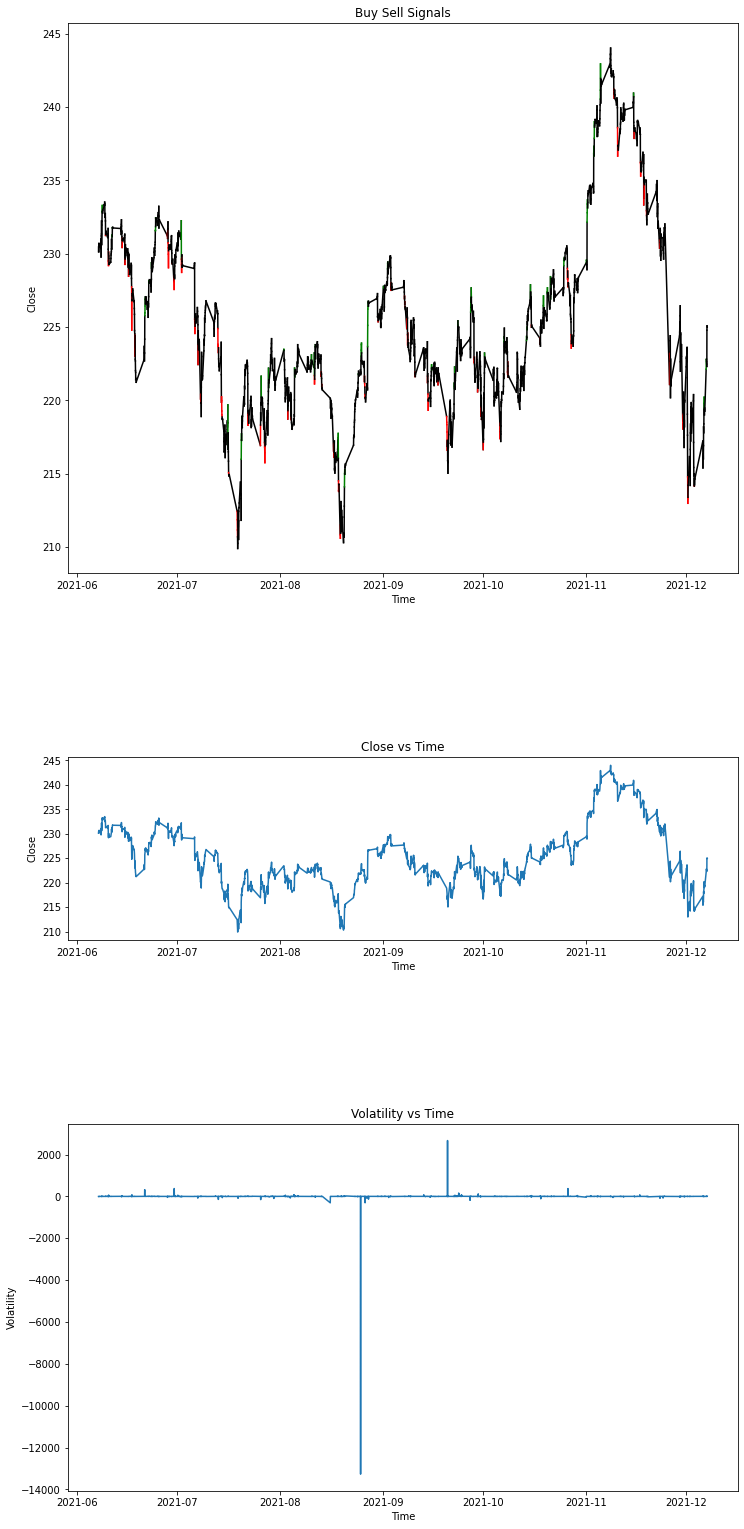

In [15]:
if __name__ == "__main__":
    main_2(data)